In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('titanic_train.csv')

In [8]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(891, 12)

In [10]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

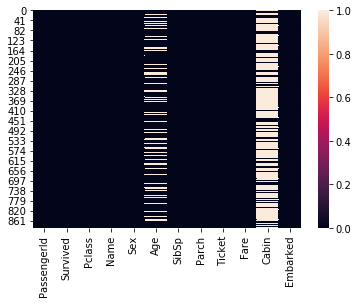

In [12]:
sns.heatmap(data.isnull())

In [13]:
#Replace Nan values
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Cabin'].fillna(data['Cabin'].mode().values[0],inplace=True)
data['Embarked'].fillna(data['Embarked'].mode().values[0],inplace=True)


In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [16]:
data.drop(['Ticket','Name'],axis=1 , inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Sex','Embarked','Cabin']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [18]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,47,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,47,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,47,2


In [19]:
from scipy.stats import zscore
import numpy as np
zs=np.abs(zscore(data))
zs

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.50244517, 0.28188124,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.78684529, 1.16154512,
        1.9423032 ],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.48885426, 0.28188124,
        0.58595414],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.17626324, 0.28188124,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.04438104, 0.27001707,
        1.9423032 ],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.49237783, 0.28188124,
        0.67817453]])

In [20]:
df=data[(zs<3).all(axis=1)]

From the above encoding the male has been encoded as 1 and female as 0 for the Sex attribute

In [21]:
df_cor=df.corr()
df_cor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.012587,-0.022799,0.070057,-0.005677,-0.053197,0.019475,-0.008603,0.008040,0.021654
Survived,-0.012587,1.000000,-0.323997,-0.553605,-0.067916,0.076077,0.194381,0.326516,0.202245,-0.151707
Pclass,-0.022799,-0.323997,1.000000,0.141506,-0.319507,-0.044376,-0.083499,-0.687690,-0.276767,0.127747
Sex,0.070057,-0.553605,0.141506,1.000000,0.091704,-0.203084,-0.248489,-0.245103,-0.094746,0.116048
Age,-0.005677,-0.067916,-0.319507,0.091704,1.000000,-0.134384,-0.250574,0.147262,0.118153,-0.007153
SibSp,-0.053197,0.076077,-0.044376,-0.203084,-0.134384,1.000000,0.306679,0.244819,0.037062,-0.014925
Parch,0.019475,0.194381,-0.083499,-0.248489,-0.250574,0.306679,1.000000,0.264076,0.035748,-0.024763
Fare,-0.008603,0.326516,-0.687690,-0.245103,0.147262,0.244819,0.264076,1.000000,0.268012,-0.187475
Cabin,0.008040,0.202245,-0.276767,-0.094746,0.118153,0.037062,0.035748,0.268012,1.000000,-0.014812
Embarked,0.021654,-0.151707,0.127747,0.116048,-0.007153,-0.014925,-0.024763,-0.187475,-0.014812,1.000000


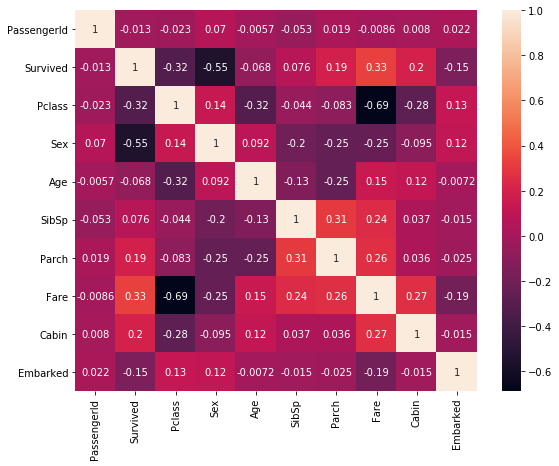

In [22]:
plt.figure(figsize=(9,7))
sns.heatmap(df_cor,annot=True)

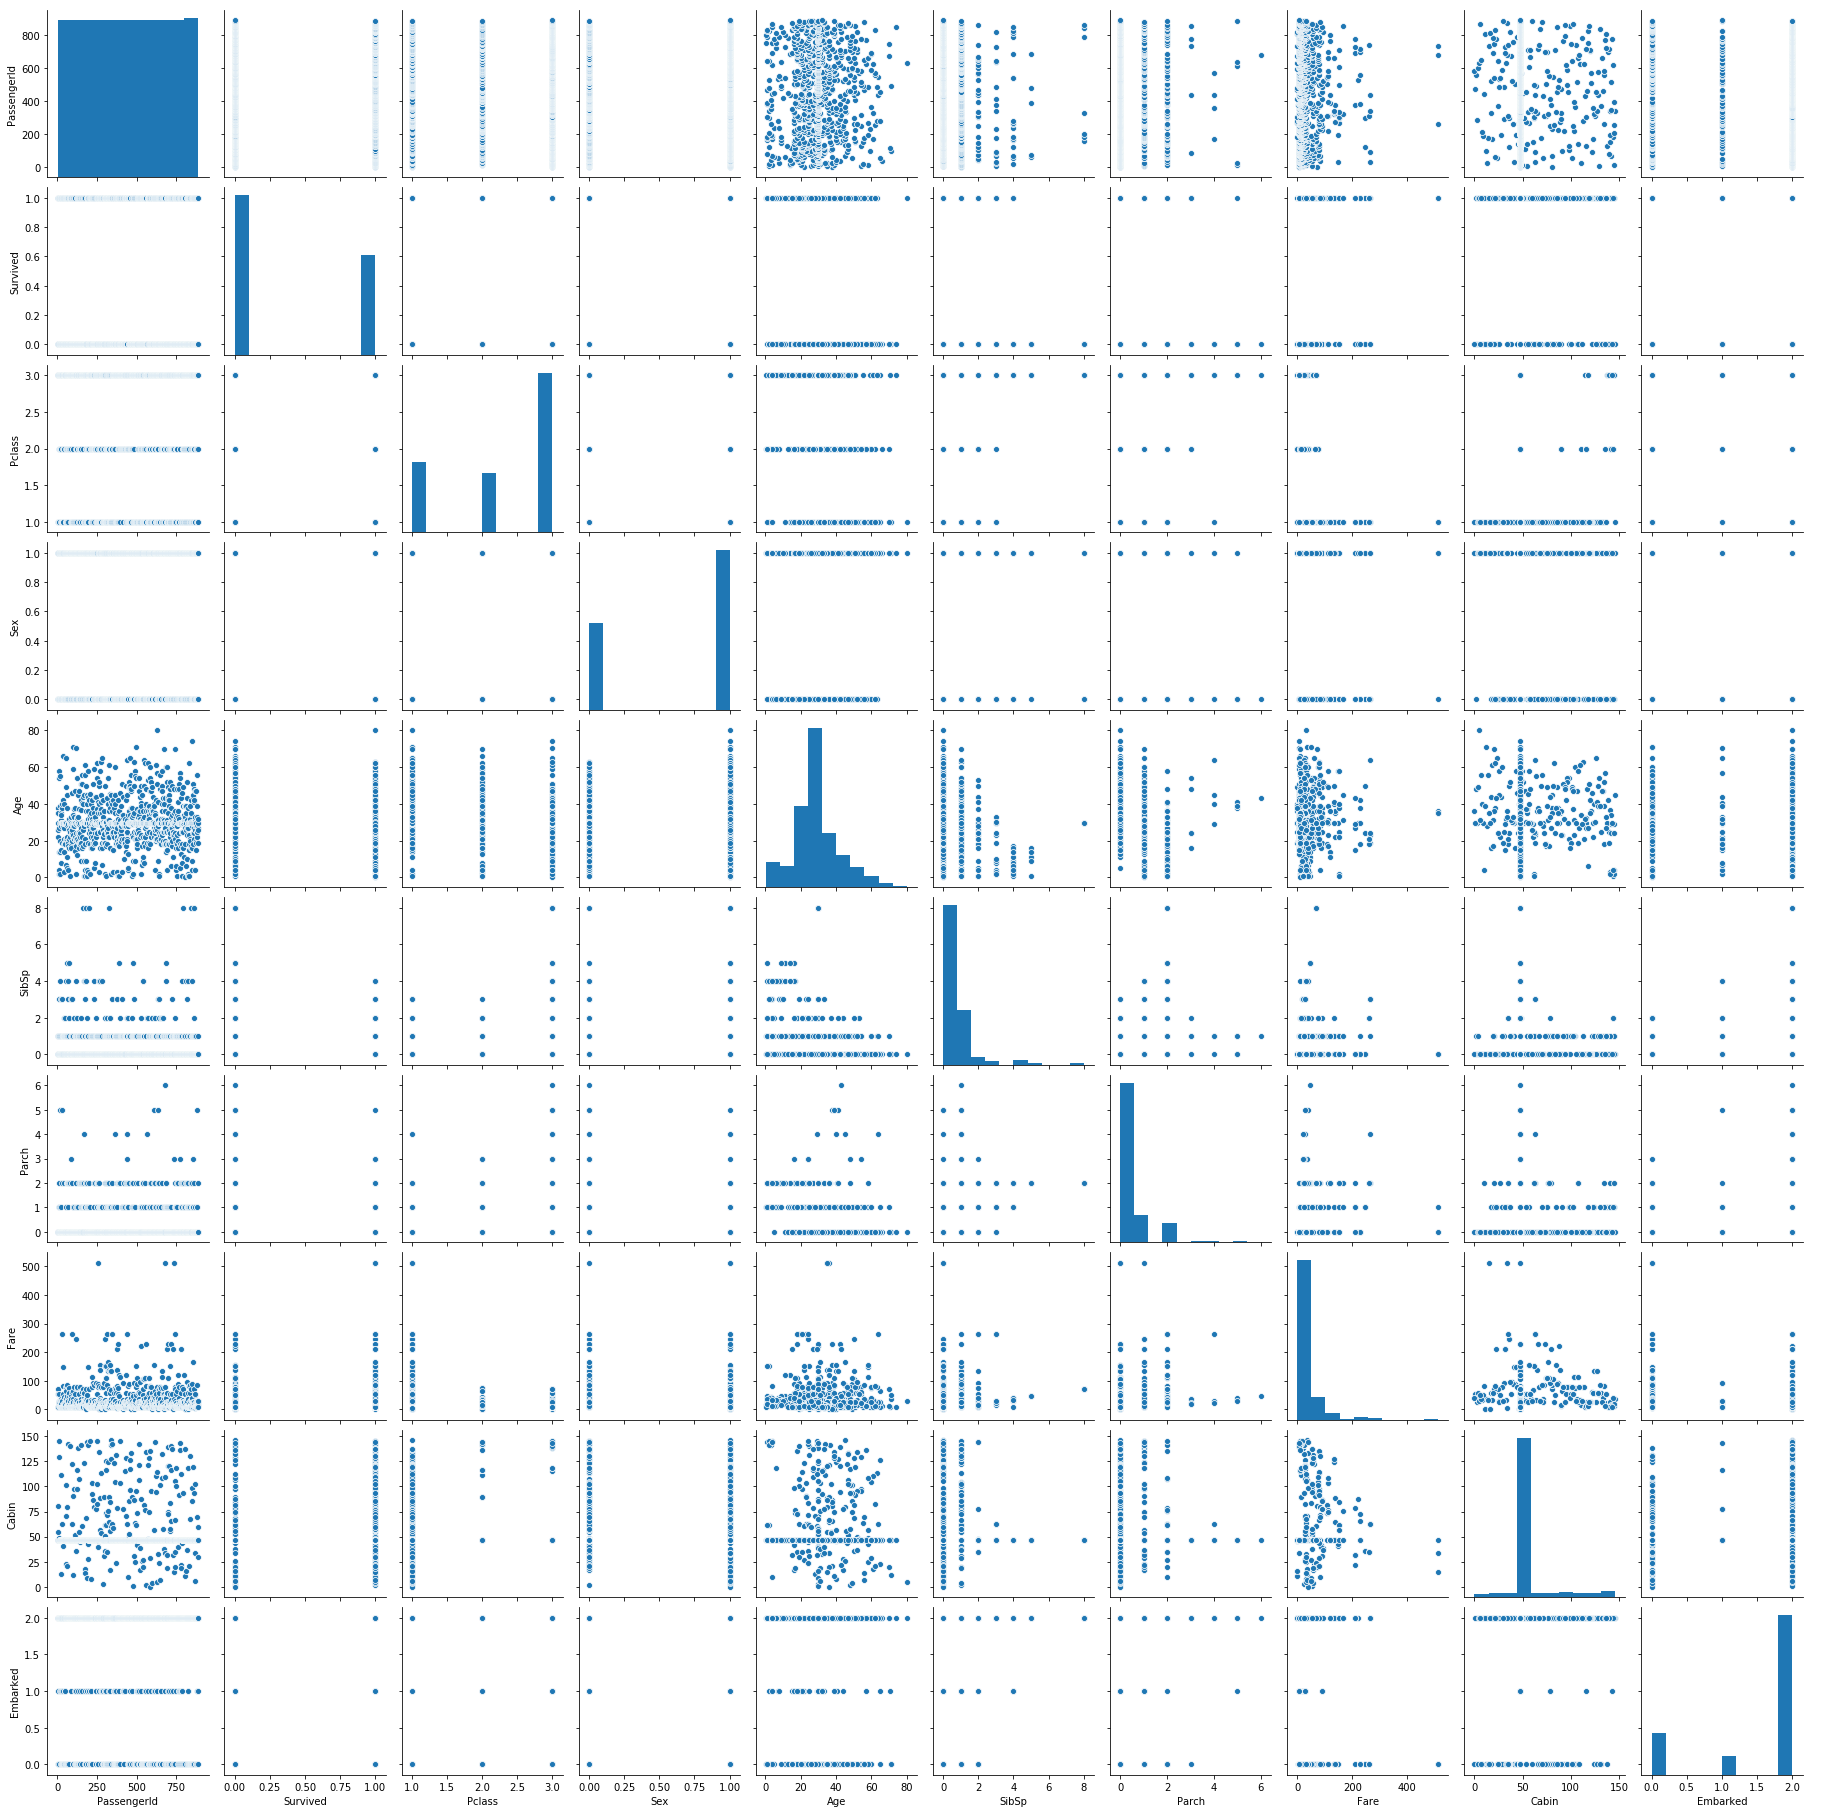

In [23]:
sns.pairplot(data)

In [24]:
x=df.iloc[:,2:-1]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,1,22.000000,1,0,7.2500,47
1,1,0,38.000000,1,0,71.2833,81
2,3,0,26.000000,0,0,7.9250,47
3,1,0,35.000000,1,0,53.1000,55
4,3,1,35.000000,0,0,8.0500,47
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,47
887,1,0,19.000000,0,0,30.0000,30
888,3,0,29.699118,1,2,23.4500,47
889,1,1,26.000000,0,0,30.0000,60


In [25]:
y=df.iloc[:,1]

In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 786, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [28]:
random_state=np.arange(42,101)
accuracy=0
for r_state in random_state:
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    DT=DecisionTreeClassifier()
    DT.fit(train_x,train_y)
    pred_DT = DT.predict(test_x)
    print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
    if accuracy_score(test_y,pred_DT) > accuracy:
        accuracy=accuracy_score(test_y,pred_DT)
        Final_r_state=r_state
        
print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    

The accuracy for the 42 is 0.7415254237288136
The accuracy for the 43 is 0.7669491525423728
The accuracy for the 44 is 0.7796610169491526
The accuracy for the 45 is 0.7923728813559322
The accuracy for the 46 is 0.8050847457627118
The accuracy for the 47 is 0.7415254237288136
The accuracy for the 48 is 0.7542372881355932
The accuracy for the 49 is 0.7415254237288136
The accuracy for the 50 is 0.826271186440678
The accuracy for the 51 is 0.7669491525423728
The accuracy for the 52 is 0.7627118644067796
The accuracy for the 53 is 0.7288135593220338
The accuracy for the 54 is 0.788135593220339
The accuracy for the 55 is 0.7711864406779662
The accuracy for the 56 is 0.7584745762711864
The accuracy for the 57 is 0.7627118644067796
The accuracy for the 58 is 0.7457627118644068
The accuracy for the 59 is 0.7584745762711864
The accuracy for the 60 is 0.788135593220339
The accuracy for the 61 is 0.7076271186440678
The accuracy for the 62 is 0.7372881355932204
The accuracy for the 63 is 0.77966101

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean()

0.7748931710070145

In [30]:
random_state=np.arange(42,101)
accuracy=0
for r_state in random_state:
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    svc=SVC()
    svc.fit(train_x,train_y)
    pred_svc = svc.predict(test_x)
    print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_svc)))
    if accuracy_score(test_y,pred_svc) > accuracy:
        accuracy=accuracy_score(test_y,pred_svc)
        Final_r_state=r_state
        
print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    

The accuracy for the 42 is 0.6694915254237288
The accuracy for the 43 is 0.6483050847457628
The accuracy for the 44 is 0.6864406779661016
The accuracy for the 45 is 0.7033898305084746
The accuracy for the 46 is 0.6991525423728814
The accuracy for the 47 is 0.7033898305084746
The accuracy for the 48 is 0.7288135593220338
The accuracy for the 49 is 0.6822033898305084
The accuracy for the 50 is 0.7288135593220338
The accuracy for the 51 is 0.6779661016949152
The accuracy for the 52 is 0.7076271186440678
The accuracy for the 53 is 0.7161016949152542
The accuracy for the 54 is 0.6949152542372882
The accuracy for the 55 is 0.6652542372881356
The accuracy for the 56 is 0.6822033898305084
The accuracy for the 57 is 0.7033898305084746
The accuracy for the 58 is 0.6864406779661016
The accuracy for the 59 is 0.6822033898305084
The accuracy for the 60 is 0.6822033898305084
The accuracy for the 61 is 0.7033898305084746
The accuracy for the 62 is 0.673728813559322
The accuracy for the 63 is 0.703389

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean()

0.7024026445214867

In [32]:
random_state=np.arange(42,101)
accuracy=0
for r_state in random_state:
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    NB=GaussianNB()
    NB.fit(train_x,train_y)
    pred = NB.predict(test_x)
    print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred)))
    if accuracy_score(test_y,pred) > accuracy:
        accuracy=accuracy_score(test_y,pred)
        Final_r_state=r_state
        
print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    

The accuracy for the 42 is 0.7033898305084746
The accuracy for the 43 is 0.7033898305084746
The accuracy for the 44 is 0.7457627118644068
The accuracy for the 45 is 0.7542372881355932
The accuracy for the 46 is 0.7669491525423728
The accuracy for the 47 is 0.7372881355932204
The accuracy for the 48 is 0.7542372881355932
The accuracy for the 49 is 0.7288135593220338
The accuracy for the 50 is 0.8220338983050848
The accuracy for the 51 is 0.7076271186440678
The accuracy for the 52 is 0.7627118644067796
The accuracy for the 53 is 0.7838983050847458
The accuracy for the 54 is 0.7627118644067796
The accuracy for the 55 is 0.6779661016949152
The accuracy for the 56 is 0.8008474576271186
The accuracy for the 57 is 0.788135593220339
The accuracy for the 58 is 0.7838983050847458
The accuracy for the 59 is 0.7245762711864406
The accuracy for the 60 is 0.7754237288135594
The accuracy for the 61 is 0.7245762711864406
The accuracy for the 62 is 0.7372881355932204
The accuracy for the 63 is 0.766949

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean()

0.7634443279851648

In [34]:
random_state=np.arange(42,101)
accuracy=0
for r_state in random_state:
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    Knn=KNeighborsClassifier()
    Knn.fit(train_x,train_y)
    pred = Knn.predict(test_x)
    print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred)))
    if accuracy_score(test_y,pred) > accuracy:
        accuracy=accuracy_score(test_y,pred)
        Final_r_state=r_state
        
print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    

The accuracy for the 42 is 0.6991525423728814
The accuracy for the 43 is 0.652542372881356
The accuracy for the 44 is 0.7288135593220338
The accuracy for the 45 is 0.711864406779661
The accuracy for the 46 is 0.7161016949152542
The accuracy for the 47 is 0.7033898305084746
The accuracy for the 48 is 0.711864406779661
The accuracy for the 49 is 0.6991525423728814
The accuracy for the 50 is 0.7161016949152542
The accuracy for the 51 is 0.711864406779661
The accuracy for the 52 is 0.6949152542372882
The accuracy for the 53 is 0.6949152542372882
The accuracy for the 54 is 0.7245762711864406
The accuracy for the 55 is 0.7288135593220338
The accuracy for the 56 is 0.690677966101695
The accuracy for the 57 is 0.7076271186440678
The accuracy for the 58 is 0.711864406779661
The accuracy for the 59 is 0.7330508474576272
The accuracy for the 60 is 0.6652542372881356
The accuracy for the 61 is 0.6864406779661016
The accuracy for the 62 is 0.6949152542372882
The accuracy for the 63 is 0.71186440677

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean()

0.712537289365476

In [36]:
random_state=np.arange(42,101)
accuracy=0
for r_state in random_state:
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(train_x,train_y)
    pred = lr.predict(test_x)
    print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred)))
    if accuracy_score(test_y,pred) > accuracy:
        accuracy=accuracy_score(test_y,pred)
        Final_r_state=r_state
        
print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    

The accuracy for the 42 is 0.7542372881355932
The accuracy for the 43 is 0.7711864406779662
The accuracy for the 44 is 0.7923728813559322
The accuracy for the 45 is 0.7711864406779662
The accuracy for the 46 is 0.8135593220338984
The accuracy for the 47 is 0.7754237288135594
The accuracy for the 48 is 0.8135593220338984
The accuracy for the 49 is 0.7966101694915254
The accuracy for the 50 is 0.8135593220338984
The accuracy for the 51 is 0.809322033898305
The accuracy for the 52 is 0.7923728813559322
The accuracy for the 53 is 0.7838983050847458
The accuracy for the 54 is 0.8008474576271186
The accuracy for the 55 is 0.7796610169491526
The accuracy for the 56 is 0.8050847457627118
The accuracy for the 57 is 0.788135593220339
The accuracy for the 58 is 0.7796610169491526
The accuracy for the 59 is 0.7966101694915254
The accuracy for the 60 is 0.8050847457627118
The accuracy for the 61 is 0.7923728813559322
The accuracy for the 62 is 0.7457627118644068
The accuracy for the 63 is 0.8093220

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5 ,scoring='accuracy').mean()

0.7964363460453117

Decision Tree --The maximum accuracy reached is 0.8347457627118644 at random state 50 

Support Vector Classifier -- The maximum accuracy reached is 0.75 at random state 71

Naive Bayes - The maximum accuracy reached is 0.8220338983050848 at random state 50

KNN--The maximum accuracy reached is 0.7584745762711864 at random state 98

Logistic Regression -- The maximum accuracy reached is 0.847457627118644 at random state 99

From the above observation it can be concluded that based on accuracy Decision Tree and random state is performing well

Therefore based on the above conclusion Decision Tree  is selected as our final model.

Accuracy 0.7415254237288136


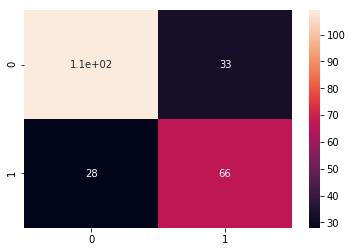

In [38]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=50)
DT=DecisionTreeClassifier()
DT.fit(train_x,train_y)
pred_DT = DT.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred_DT))
sns.heatmap(confusion_matrix(test_y,pred_DT),annot=True)


# Saving The Model

In [39]:
from sklearn.externals import joblib
joblib.dump(DT,"DT_Titanic.pkl")

['DT_Titanic.pkl']